In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
#para exportar el gráfico como archivo.dot
from sklearn.tree import export_graphviz  

#para visualizar el arbol desde el formato .dot
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [85]:
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

In [86]:
def grafica_roc(clf, y_test):
    '''Grafica la curva ROC para el conjunto de prueba'''
    y_test_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)  #Area bajo la curva (AUC, por sus siglas en inglés)
    plt.figure()
    plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)  
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

Lectura de datos

In [87]:
df = pd.read_csv('C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Examenes\\Clasificacion\\data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Data Exploration

In [88]:
df=df.drop(columns='Unnamed: 32')

In [89]:
df['diagnosis'] = np.where(df['diagnosis']=='M', 1, 0)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [91]:
df = df.set_index('id')

In [92]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

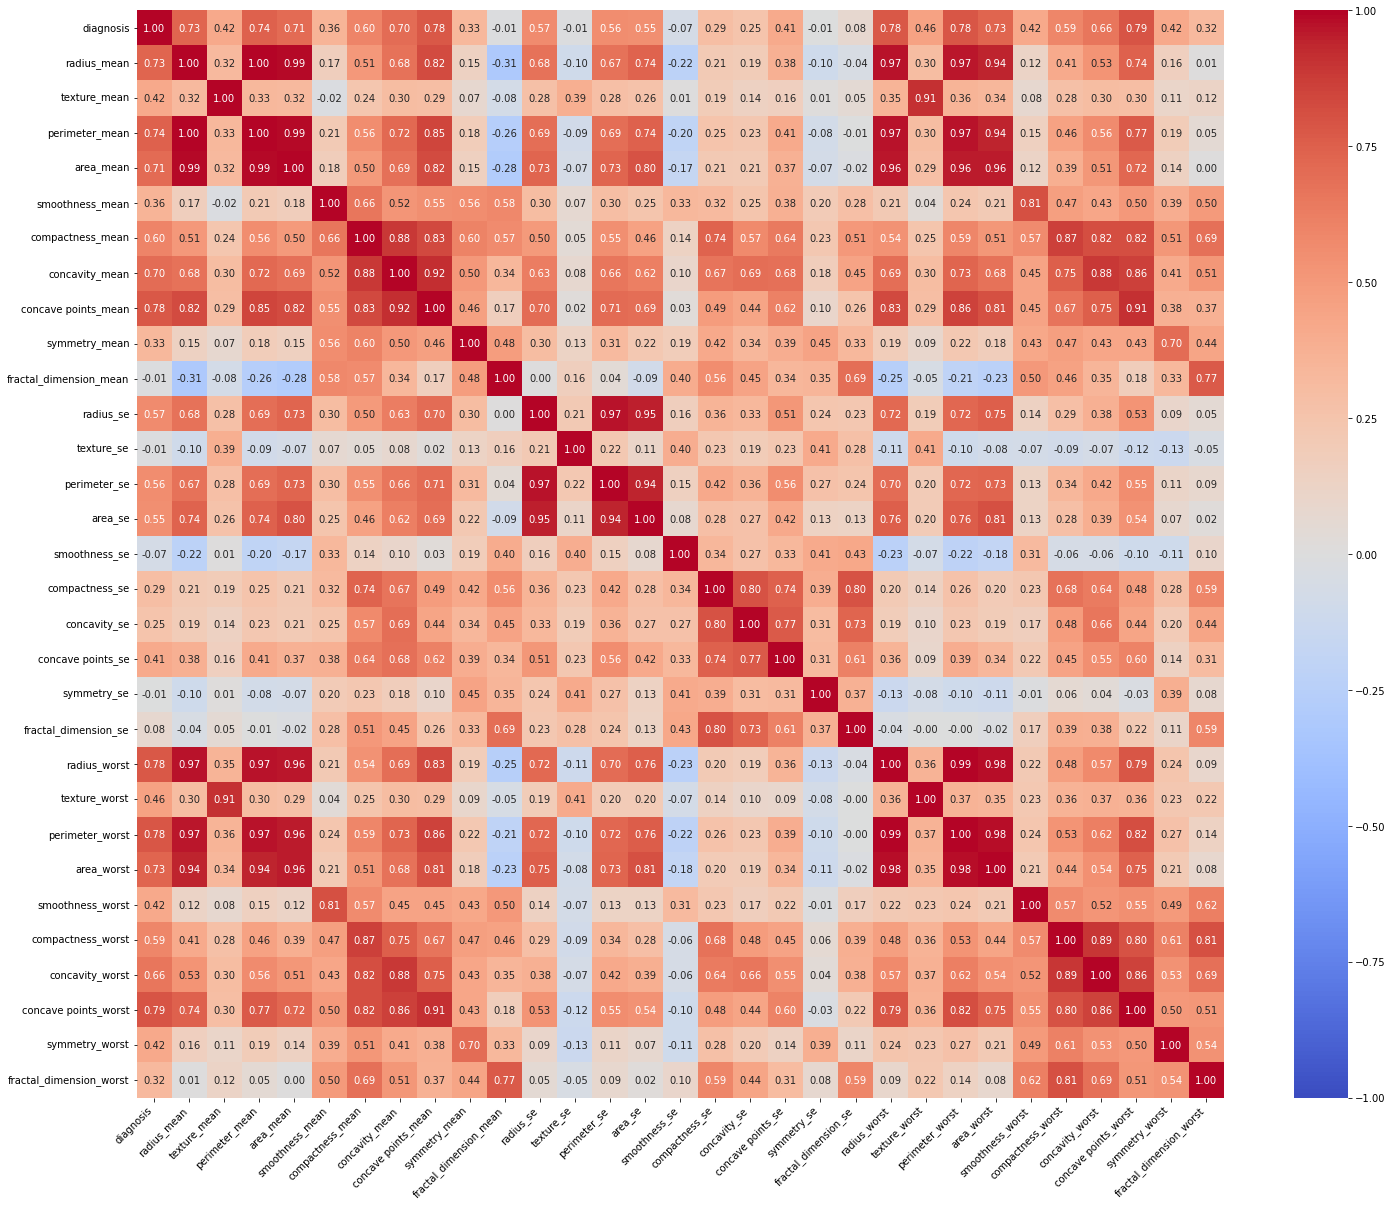

In [93]:
corr_matrix = correlacion(df, grafica=True, matrix=True)

In [94]:
#Identificar variables redundantes 

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix),1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es 1
borrar = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] == 1)]
borrar

[]

<AxesSubplot:>

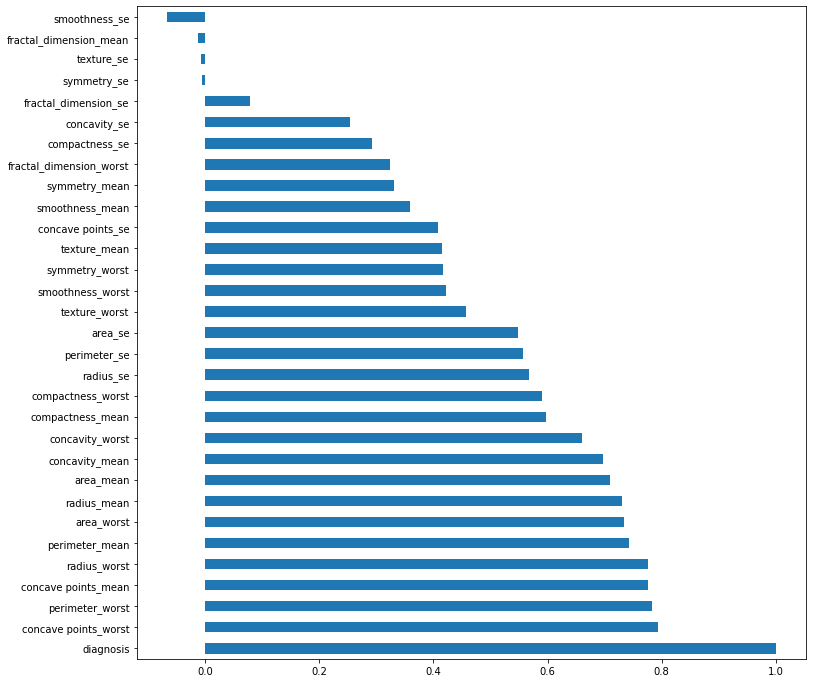

In [95]:
#Correlación de cada variable con diagnosis
plt.figure(figsize = (12,12))
df.corr()['diagnosis'].sort_values(ascending = False).plot(kind ='barh',)

Se construyen 3 dataframes con las clasificaciones mean, se y worst

In [96]:
df_mean = df.iloc[:,1:11]
df_se = df.iloc[:,11:21]
df_worst=df.iloc[:,21:31]


In [97]:
df_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


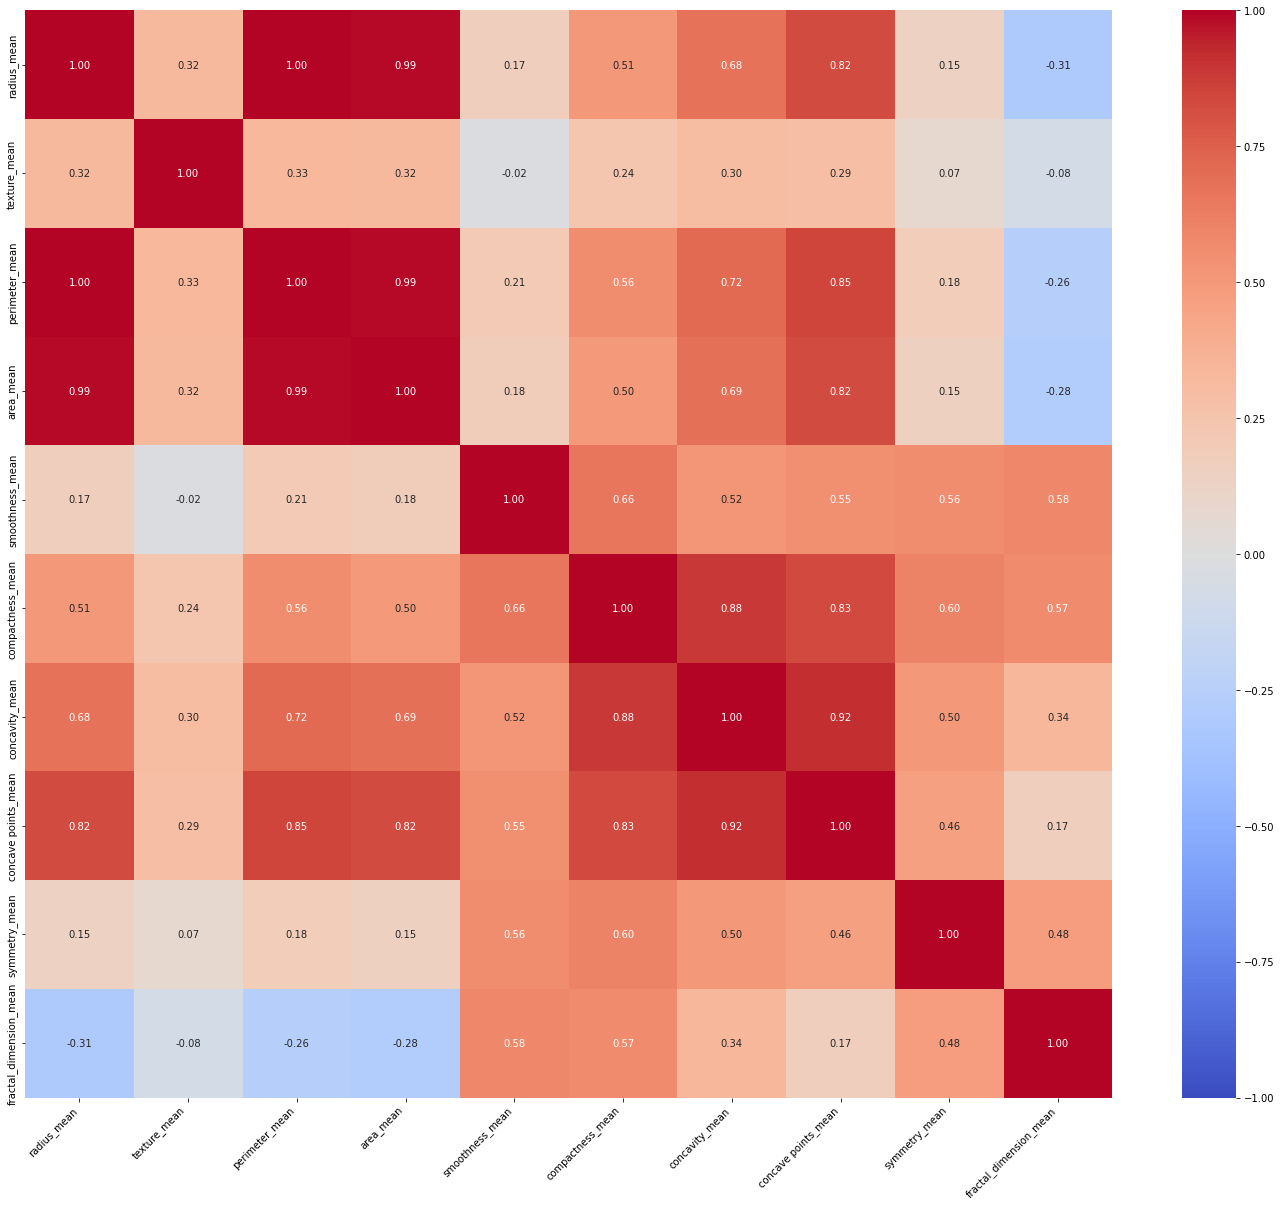

In [98]:
corr_matrix = correlacion(df_mean, grafica=True, matrix=True)

In [99]:
df_se

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,
842302,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...
926424,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
926682,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
926954,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892


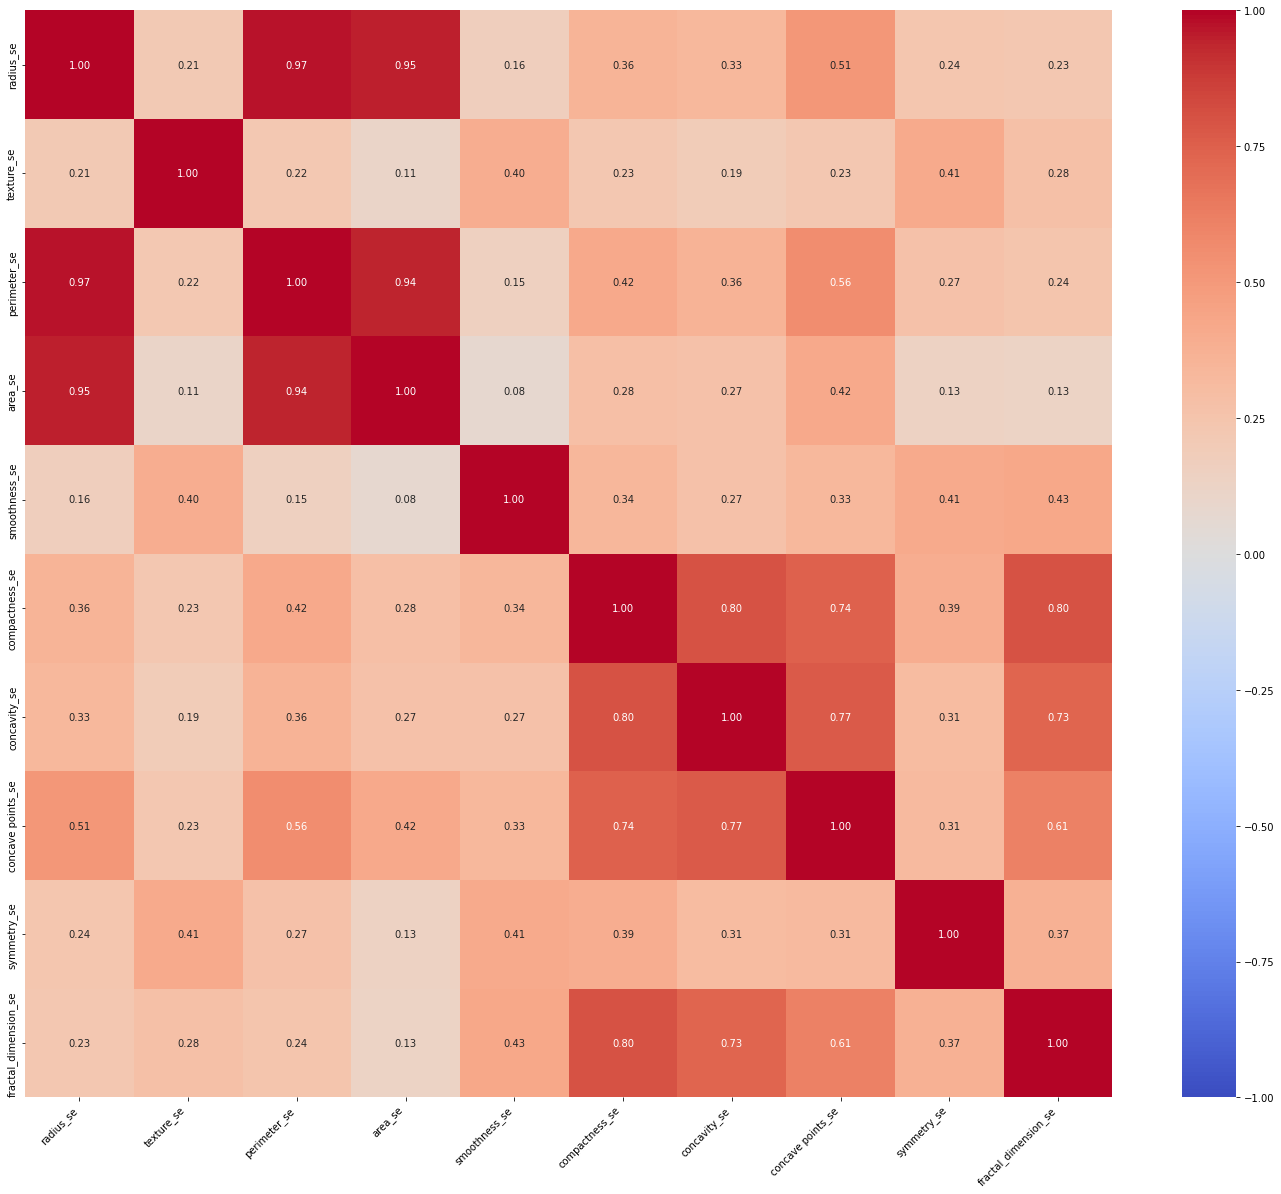

In [100]:
corr_matrix = correlacion(df_se, grafica=True, matrix=True)

In [101]:
df_worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,
842302,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
926424,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


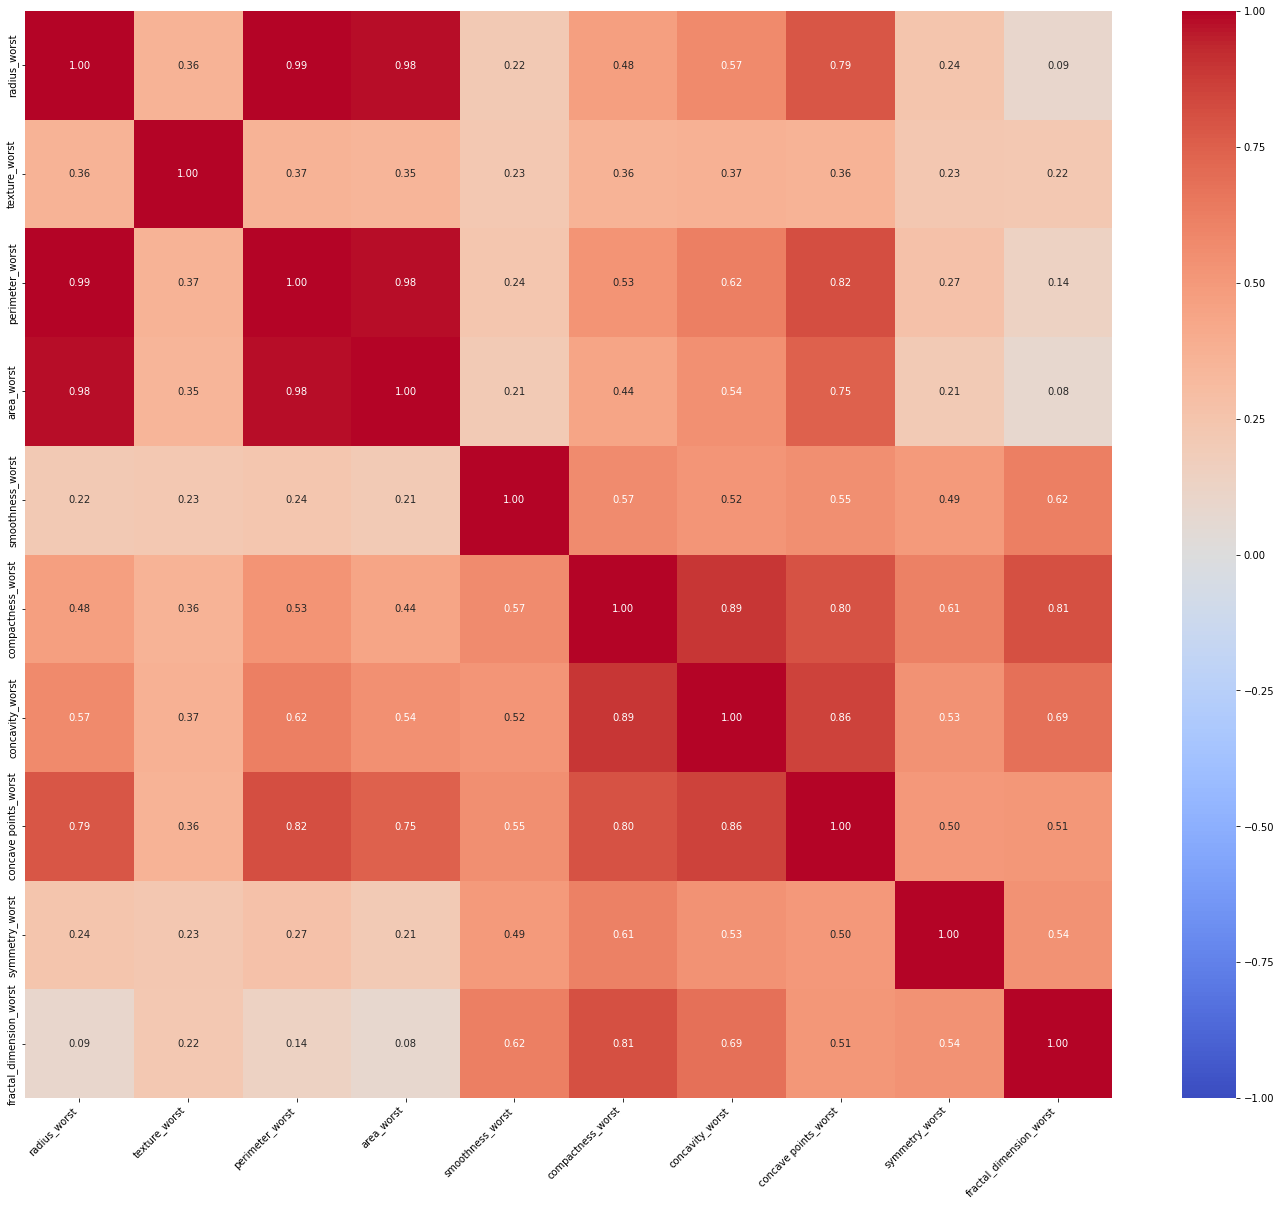

In [102]:
corr_matrix = correlacion(df_worst, grafica=True, matrix=True)

Se determinan las caracteristicas X e Y

In [103]:
X_mean = df_mean.drop(columns=['perimeter_mean','area_mean'])
X_se = df_se.drop(columns=['perimeter_se','area_se'])
X_worst = df_worst.drop(columns=['perimeter_worst','area_worst'])
Y = df['diagnosis']

Se construyen los conjuntos entrenamiento y prueba, y se entrenan 3 modelos de decision tree para cada uno de los dataframes

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, Y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=0)

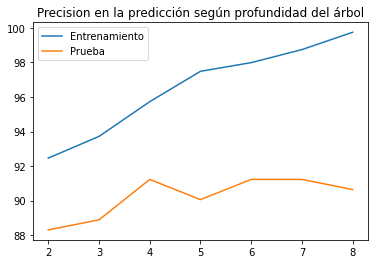

In [105]:
#Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
precision_train= {}
precision_test = {}

for p in range(2,9):
  #Entrenamiento del modelo
  clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", 
                               random_state = 0).fit(X_train, y_train)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
  y_pred_train[p] = clf[p].predict(X_train)
  precision_train[p] = accuracy_score(y_train, y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
  y_pred_test[p] = clf[p].predict(X_test)
  precision_test[p] = accuracy_score(y_test, y_pred_test[p])*100

precision = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision.plot.line(
    title ='Precision en la predicción según profundidad del árbol')
plt.show()

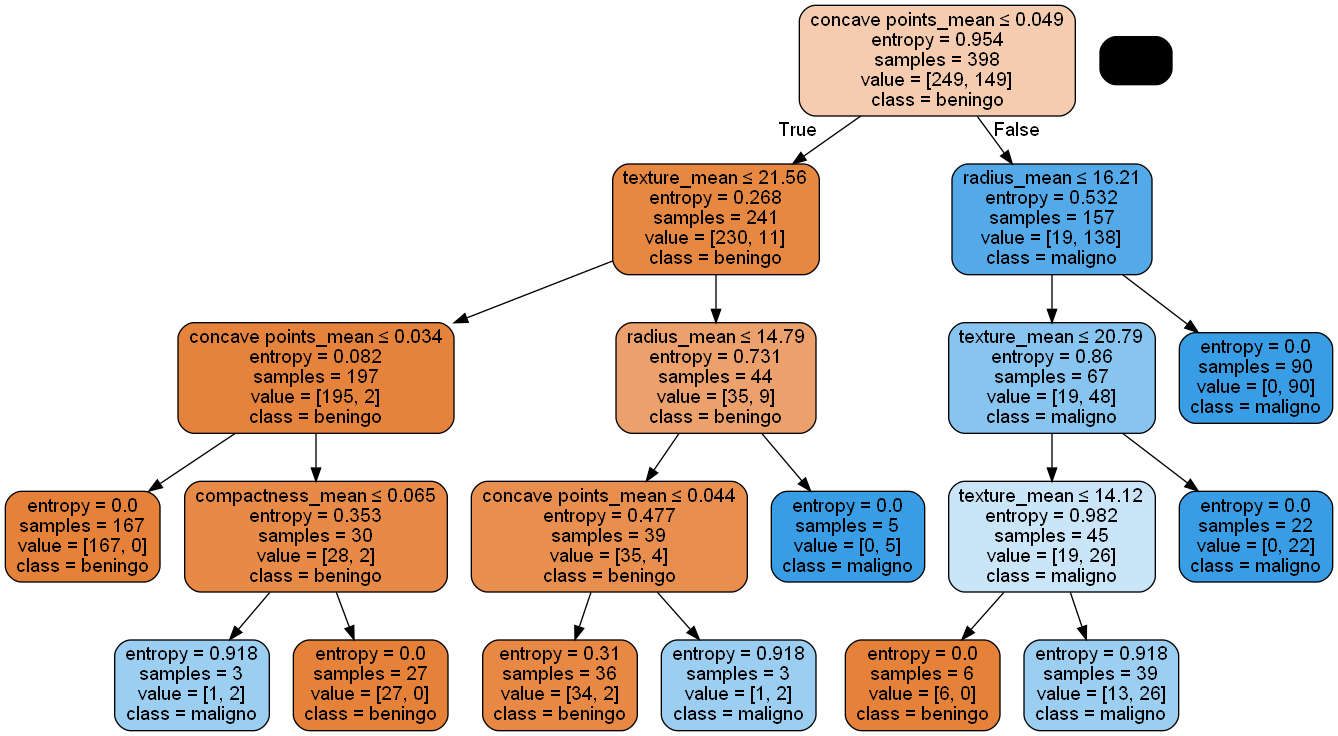

In [106]:
#Método 1 para graficar el arbol exportando el arbol como un archivo .dot

dot_data = export_graphviz(clf[4], rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X_mean.columns,
                           max_depth = 4,
                           class_names = ['beningo','maligno'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png( ))

<AxesSubplot:>

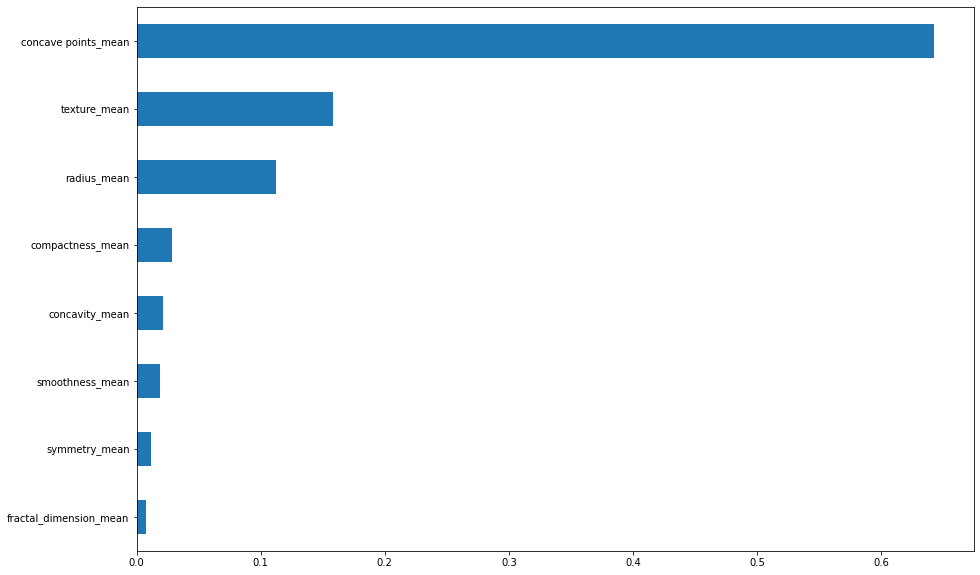

In [107]:
weights = pd.Series(clf[8].feature_importances_,
                    index=X_mean.columns.values)

weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

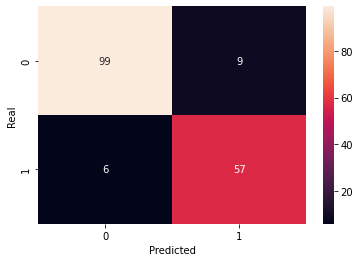

In [108]:
#Matriz de confusión

import seaborn as sns

data = {'Z_Real':  y_test,
        'Z_Prediccion': y_pred_test[4]
        }

df = pd.DataFrame(data, columns=['Z_Real','Z_Prediccion'])
confusion_matrix = pd.crosstab(df['Z_Real'], df['Z_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


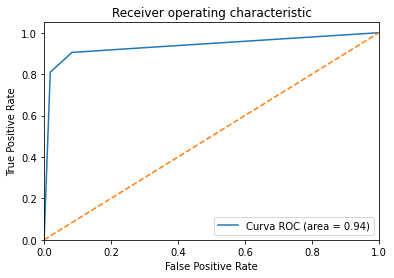

In [112]:
grafica_roc(clf[4], y_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0, 
                                criterion='entropy').fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
print("Precisión del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))


Precisión del modelo Bosque Aleatorio en el conjunto de prueba: 92.98%


<AxesSubplot:>

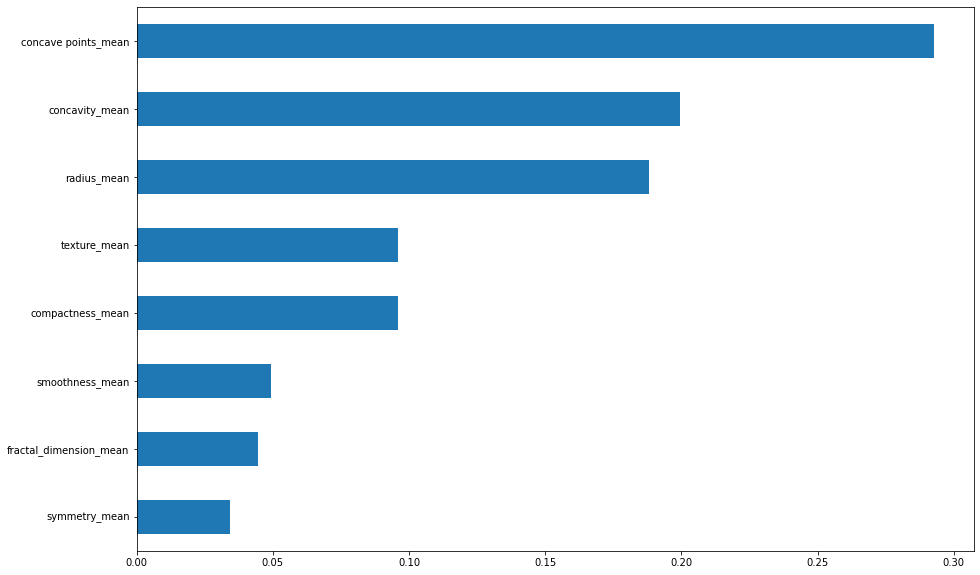

In [114]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X_mean.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_se, Y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=0)

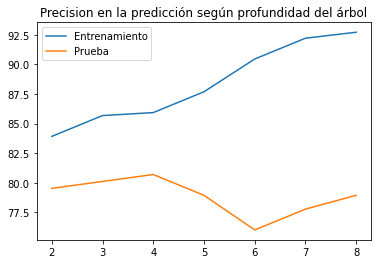

In [116]:
#Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
precision_train= {}
precision_test = {}

for p in range(2,9):
  #Entrenamiento del modelo
  clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", 
                               random_state = 0).fit(X_train, y_train)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
  y_pred_train[p] = clf[p].predict(X_train)
  precision_train[p] = accuracy_score(y_train, y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
  y_pred_test[p] = clf[p].predict(X_test)
  precision_test[p] = accuracy_score(y_test, y_pred_test[p])*100

precision = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision.plot.line(
    title ='Precision en la predicción según profundidad del árbol')
plt.show()

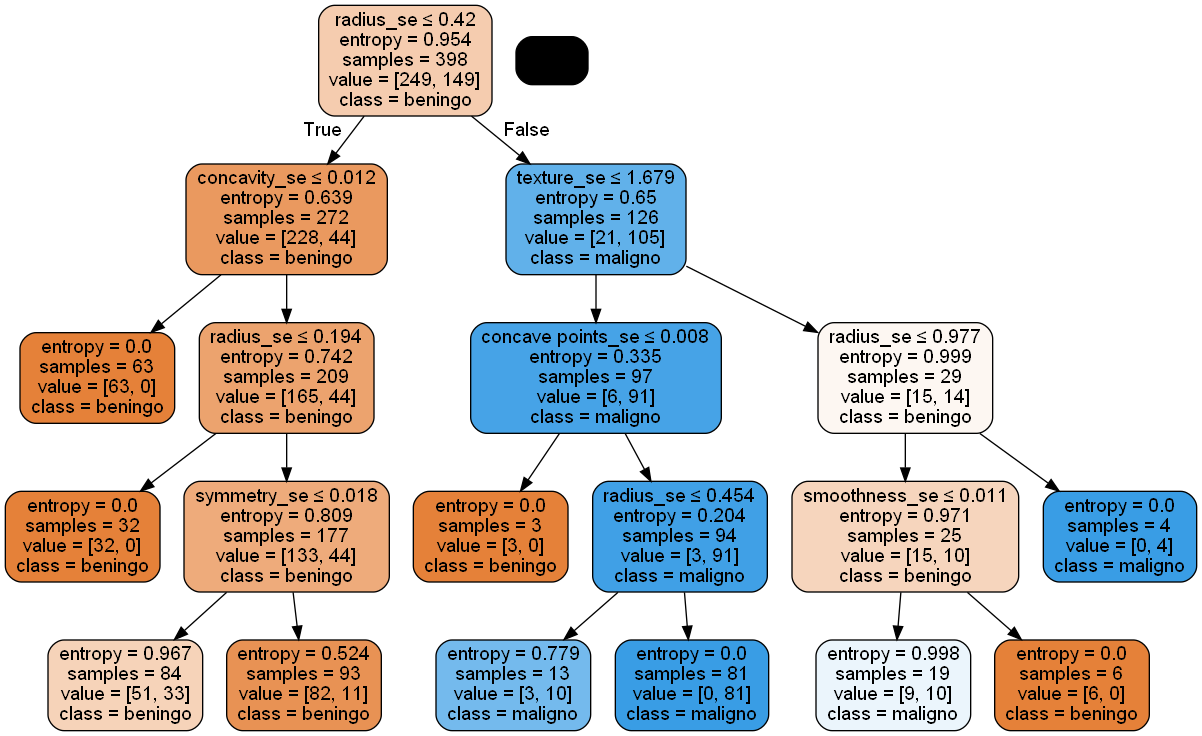

In [122]:
#Método 1 para graficar el arbol exportando el arbol como un archivo .dot

dot_data = export_graphviz(clf[4], rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X_se.columns,
                           max_depth = 4,
                           class_names = ['beningo','maligno'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png( ))

<AxesSubplot:>

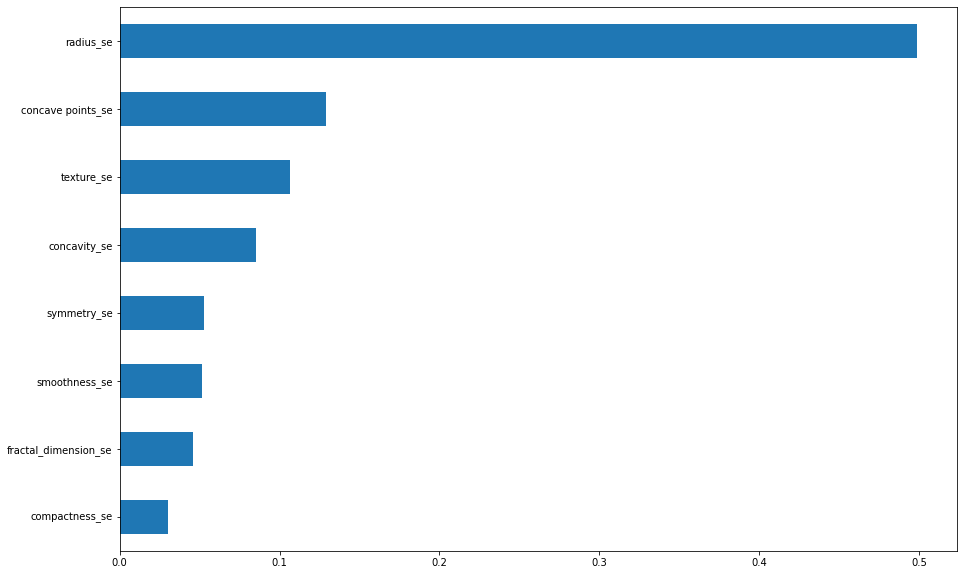

In [123]:
weights = pd.Series(clf[8].feature_importances_,
                    index=X_se.columns.values)

weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

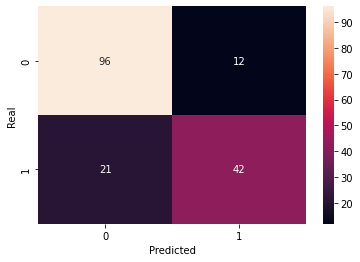

In [124]:
#Matriz de confusión

import seaborn as sns

data = {'Z_Real':  y_test,
        'Z_Prediccion': y_pred_test[4]
        }

df = pd.DataFrame(data, columns=['Z_Real','Z_Prediccion'])
confusion_matrix = pd.crosstab(df['Z_Real'], df['Z_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


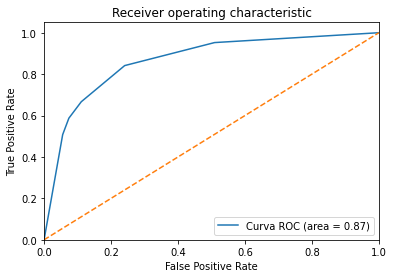

In [120]:
grafica_roc(clf[4], y_test)

In [121]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0, 
                                criterion='entropy').fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
print("Precisión del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))

Precisión del modelo Bosque Aleatorio en el conjunto de prueba: 85.38%


<AxesSubplot:>

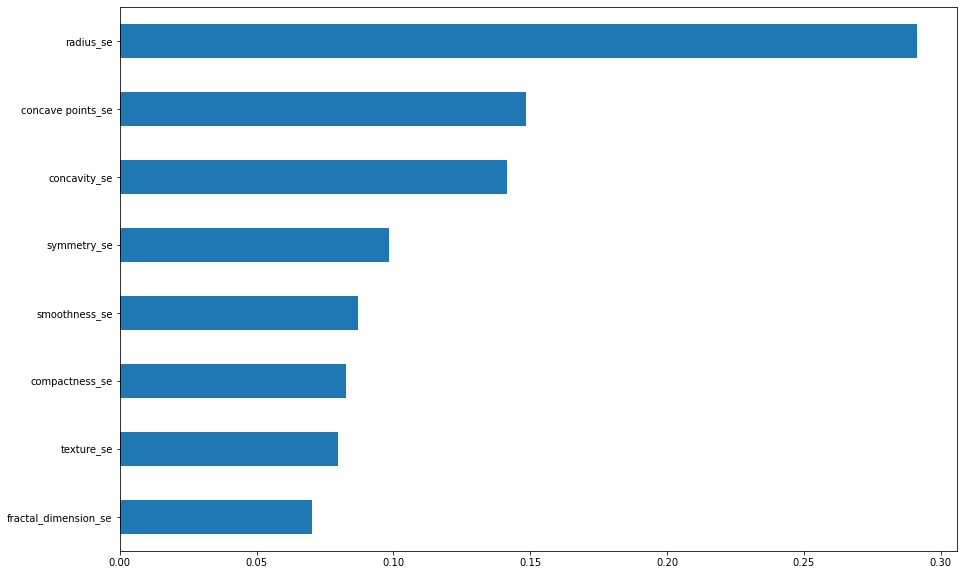

In [125]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X_se.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_worst, Y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=0)

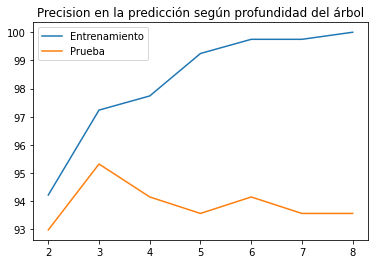

In [128]:
#Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
precision_train= {}
precision_test = {}

for p in range(2,9):
  #Entrenamiento del modelo
  clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", 
                               random_state = 0).fit(X_train, y_train)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
  y_pred_train[p] = clf[p].predict(X_train)
  precision_train[p] = accuracy_score(y_train, y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
  y_pred_test[p] = clf[p].predict(X_test)
  precision_test[p] = accuracy_score(y_test, y_pred_test[p])*100

precision = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision.plot.line(
    title ='Precision en la predicción según profundidad del árbol')
plt.show()

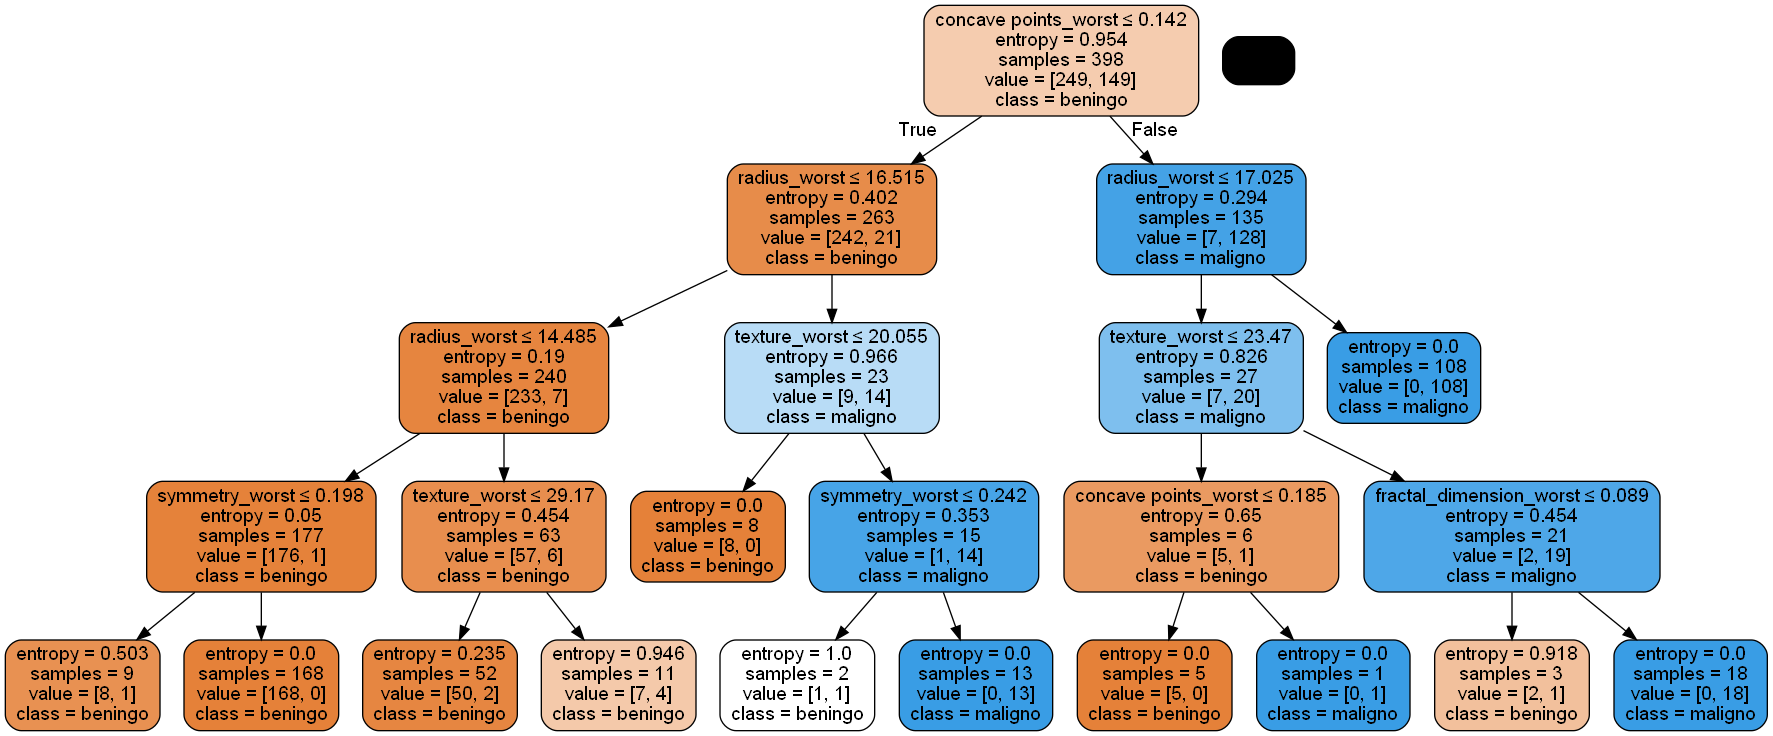

In [131]:
#Método 1 para graficar el arbol exportando el arbol como un archivo .dot

dot_data = export_graphviz(clf[4], rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X_worst.columns,
                           max_depth = 4,
                           class_names = ['beningo','maligno'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png( ))

<AxesSubplot:>

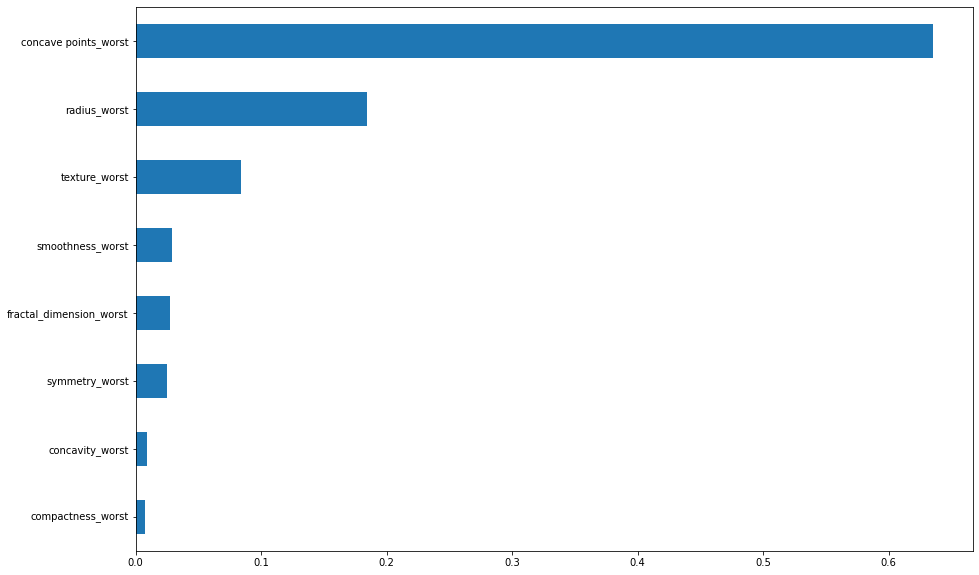

In [132]:
weights = pd.Series(clf[8].feature_importances_,
                    index=X_worst.columns.values)

weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

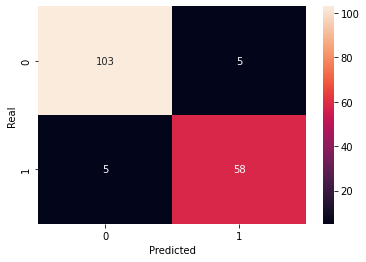

In [133]:
#Matriz de confusión

import seaborn as sns

data = {'Z_Real':  y_test,
        'Z_Prediccion': y_pred_test[4]
        }

df = pd.DataFrame(data, columns=['Z_Real','Z_Prediccion'])
confusion_matrix = pd.crosstab(df['Z_Real'], df['Z_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


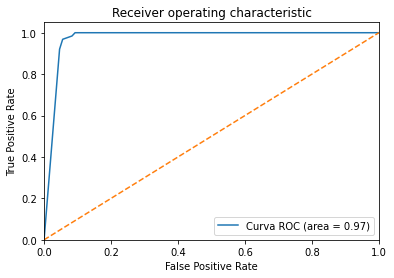

In [134]:
grafica_roc(clf[4], y_test)


In [135]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0, 
                                criterion='entropy').fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
print("Precisión del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))

Precisión del modelo Bosque Aleatorio en el conjunto de prueba: 98.25%


<AxesSubplot:>

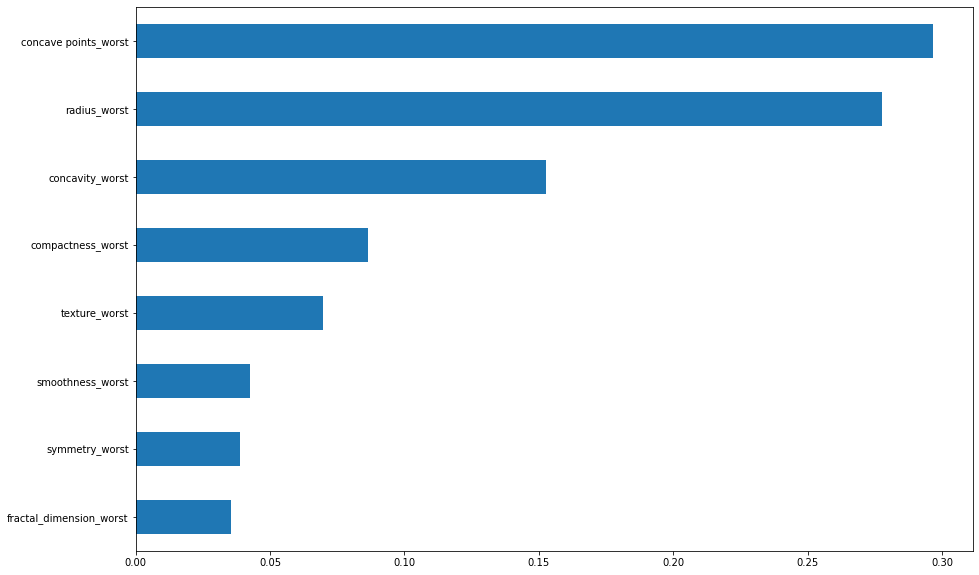

In [136]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X_worst.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(15, 10))